In [1]:
from basic_ops import *
from expected_outcom import *

In [2]:
qc=initialize(3)

In [3]:
qc.draw()

┌─────────┐
q_0: ┤ RX(π/2) ├
     ├─────────┤
q_1: ┤ RX(π/2) ├
     ├─────────┤
q_2: ┤ RX(π/2) ├
     ├─────────┤
q_3: ┤ RX(π/2) ├
     ├─────────┤
q_4: ┤ RX(π/2) ├
     ├─────────┤
q_5: ┤ RX(π/2) ├
     ├─────────┤
q_6: ┤ RX(π/2) ├
     ├─────────┤
q_7: ┤ RX(π/2) ├
     ├─────────┤
q_8: ┤ RX(π/2) ├
     └─────────┘
c: 9/═══════════

In [4]:
qc=add_cnot(qc,7,8)
qc.draw()

┌─────────┐     
q_0: ┤ RX(π/2) ├─────
     ├─────────┤     
q_1: ┤ RX(π/2) ├─────
     ├─────────┤     
q_2: ┤ RX(π/2) ├─────
     ├─────────┤     
q_3: ┤ RX(π/2) ├─────
     ├─────────┤     
q_4: ┤ RX(π/2) ├─────
     ├─────────┤     
q_5: ┤ RX(π/2) ├─────
     ├─────────┤     
q_6: ┤ RX(π/2) ├─────
     ├─────────┤     
q_7: ┤ RX(π/2) ├──■──
     ├─────────┤┌─┴─┐
q_8: ┤ RX(π/2) ├┤ X ├
     └─────────┘└───┘
c: 9/════════════════

In [5]:
qc=add_rx(qc,1,6)
qc.draw()

┌─────────┐             
q_0: ┤ RX(π/2) ├─────────────
     ├─────────┤             
q_1: ┤ RX(π/2) ├─────────────
     ├─────────┤             
q_2: ┤ RX(π/2) ├─────────────
     ├─────────┤             
q_3: ┤ RX(π/2) ├─────────────
     ├─────────┤             
q_4: ┤ RX(π/2) ├─────────────
     ├─────────┤             
q_5: ┤ RX(π/2) ├─────────────
     ├─────────┤┌───────────┐
q_6: ┤ RX(π/2) ├┤ RX(1.405) ├
     ├─────────┤└───────────┘
q_7: ┤ RX(π/2) ├──────■──────
     ├─────────┤    ┌─┴─┐    
q_8: ┤ RX(π/2) ├────┤ X ├────
     └─────────┘    └───┘    
c: 9/════════════════════════

In [6]:
qc=add_rx(qc,0,5)
qc.draw()

┌─────────┐              
q_0: ┤ RX(π/2) ├──────────────
     ├─────────┤              
q_1: ┤ RX(π/2) ├──────────────
     ├─────────┤              
q_2: ┤ RX(π/2) ├──────────────
     ├─────────┤              
q_3: ┤ RX(π/2) ├──────────────
     ├─────────┤              
q_4: ┤ RX(π/2) ├──────────────
     ├─────────┤┌────────────┐
q_5: ┤ RX(π/2) ├┤ RX(-1.405) ├
     ├─────────┤├───────────┬┘
q_6: ┤ RX(π/2) ├┤ RX(1.405) ├─
     ├─────────┤└───────────┘ 
q_7: ┤ RX(π/2) ├──────■───────
     ├─────────┤    ┌─┴─┐     
q_8: ┤ RX(π/2) ├────┤ X ├─────
     └─────────┘    └───┘     
c: 9/═════════════════════════

In [18]:
qc=add_measurement(qc,3)

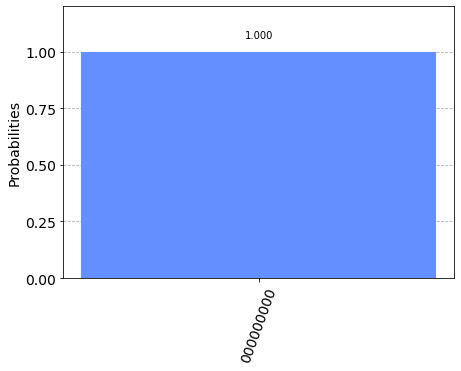

In [9]:
# Get an IonQ simulator backend to run circuits on:
backend = provider.get_backend("ionq_simulator")

# Then run the circuit:
job = backend.run(qc, shots=1000)

#save job_id
job_id_trial = job.job_id()

# Fetch the result:
result = job.result()
# histogram
plot_histogram(result.get_counts())

In [7]:
expected_outcome(qc)

TypeError: floor() takes exactly one argument (2 given)

In [25]:
from qiskit import Aer, execute
from qiskit.visualization.utils import _bloch_multivector_data
import numpy as np

# Caculates the probability of measurign 0 for each qubit
state_sim = Aer.get_backend('statevector_simulator')
sim = execute(qc, state_sim, shots=1000)
state_sim_result = sim.result()
state_vec = state_sim_result.get_statevector(decimals=3)
p0s = []
for kk in _bloch_multivector_data(state_vec):
    if kk[2] != 0:
        theta = np.arccos(round(kk[2]/np.sum(np.asarray(kk)**2), 3))
    else:
        theta = np.pi/2
    p0 = round(np.cos(theta/2)**2,2)
    p0s.append(p0)


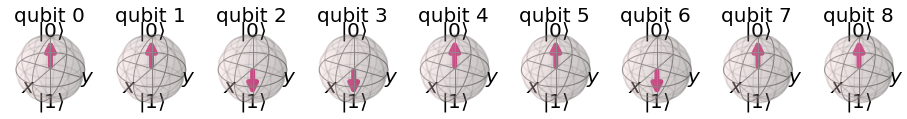

In [26]:
plot_bloch_multivector(state_vec)

In [27]:
p0s

[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]

In [10]:
qc.ry(-math.pi/2.,3)
qc.draw()

In [28]:
from single_shot_measurement import single_shot as ss
ss(qc, single=False)

Job is not done
Job is not done
Job is not done
Job is not done
Job is not done
Job done


{'000000101': 1,
 '000010000': 2,
 '000010001': 1,
 '000010110': 1,
 '001000000': 6,
 '001000001': 12,
 '001000010': 4,
 '001000011': 7,
 '001000100': 17,
 '001000101': 9,
 '001000110': 10,
 '001000111': 8,
 '001001000': 11,
 '001001001': 6,
 '001001010': 8,
 '001001011': 4,
 '001001100': 4,
 '001001101': 8,
 '001001110': 10,
 '001001111': 3,
 '001010000': 10,
 '001010001': 13,
 '001010010': 6,
 '001010011': 8,
 '001010100': 8,
 '001010101': 10,
 '001010110': 7,
 '001010111': 8,
 '001011000': 4,
 '001011001': 8,
 '001011010': 8,
 '001011011': 1,
 '001011100': 6,
 '001011101': 7,
 '001011110': 9,
 '001011111': 7,
 '001100000': 1,
 '001110010': 1,
 '001110011': 1,
 '010011101': 1,
 '011000000': 12,
 '011000001': 11,
 '011000010': 7,
 '011000011': 11,
 '011000100': 7,
 '011000101': 7,
 '011000110': 12,
 '011000111': 6,
 '011001000': 6,
 '011001001': 6,
 '011001010': 10,
 '011001011': 4,
 '011001100': 9,
 '011001101': 10,
 '011001110': 7,
 '011001111': 9,
 '011010000': 10,
 '011010001': 15

In [50]:
def test_win(lst): #return 0 for player 0 win, 1 for player 1 win, 2 for tie or neither wins
    win1=0
    win0=0
    if lst[0]==lst[1]==lst[2]:
        if lst[1]==1:
            win1+=1
        else:
            win0+=1
    if lst[3]==lst[4]==lst[5]:
        if lst[3]==1:
            win1+=1
        else:
            win0=1
    if lst[6]==lst[7]==lst[8]:
        if lst[6]==1:
            win1+=1
        else:
            win0+=1
    if lst[0]==lst[4]==lst[8]:
        if lst[0]==1:
            win1+=1
        else:
            win0+=1
    if lst[2]==lst[4]==lst[6]:
        if lst[2]==1:
            win1+=1
        else:
            win0=1
    if lst[0]==lst[3]==lst[6]:
        if lst[0]==1:
            win1+=1
        else:
            win0+=1
    if lst[1]==lst[4]==lst[7]:
        if lst[1]==1:
            win1+=1
        else:
            win0+=1
    if lst[2]==lst[5]==lst[8]:
        if lst[2]==1:
            win1+=1
        else:
            win0+=1
    if win1>win0:
        return 1
    elif win0>win1:
        return 0
    else:
        return 2

In [39]:
a = list(result.keys())[0]

In [58]:
wins1 = 0
wins2 = 0
for kk in result:
    lst = [int(i) for i in kk]
    if test_win(lst):
        wins1 += result[kk]
    elif not test_win(lst):
        wins2 += result[kk]
    else:
        pass
return wins1, wins2

In [59]:
wins1

640

In [60]:
wins2

50